In [1]:
from arc import *
import numpy as nps
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad, dblquad
import scipy
from scipy.integrate import solve_ivp
from sympy.physics.wigner import clebsch_gordan, wigner_6j
from sympy import S, sqrt

In [2]:
print(getCitationForARC())

In [96]:
cs = Cesium()
h = 6.626e-34
e = 1.602e-19
bohr_r = 5.291e-11

In [97]:
3e8/1e12*1e6

300.0

<h2>Sideband</h2>

/Users/linipunphuttitarn/miniconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/linipunphuttitarn/miniconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/bg/kr4d63_s68j38_168mv8pchr0000gn/T/ipykernel_8779/3658845501.py:47: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


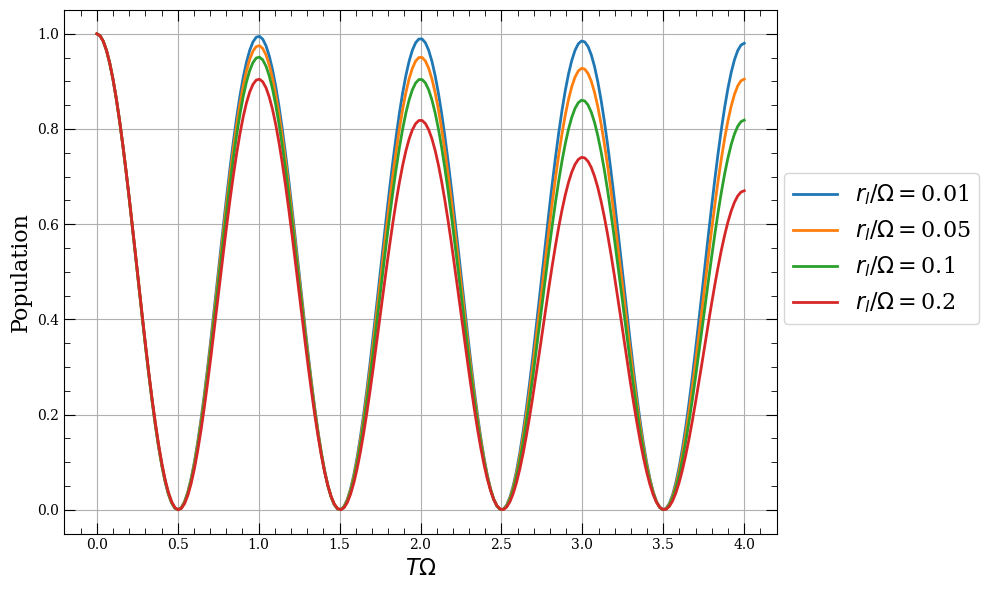

In [173]:
total_state = 3
rabi_r = 1e6
pho0 = nps.zeros((total_state,total_state)).astype(nps.complex64)
pho0[0,0] = 1
H = nps.zeros((total_state,total_state))
H[0,1] = nps.pi*rabi_r
H[1,0] = nps.pi*rabi_r

y0 = nps.concatenate((pho0.real.flatten(), pho0.imag.flatten()))
t_span = (0, 4/rabi_r)
t_eval = nps.linspace(*t_span, 200)
detuning = 0
# Plot populations
fig, ax = plt.subplots(figsize=(10, 6))
for rate in [0.01, 0.05,0.1,0.2]:
    Hl = nps.zeros((total_state,total_state))
    # for i, qs in enumerate(matrix_qs):
    Hl[2,1] = nps.sqrt(rate*1e6)
    # H[2,2] = detuning 
    # H[1,2] = nps.pi*rabi_r*rate
    # H[2,1] = nps.pi*rabi_r*rate
    # Hl[1,2] = nps.sqrt(rate*1e6*nps.pi)
    Hl_dag = Hl.conj().T
    def linbald(t,y):
        psi = y[:total_state*total_state].reshape(total_state,total_state) + 1j* y[total_state**2:].reshape(total_state,total_state)
        evo = -1j*(H@psi-psi@H)+Hl@psi@Hl_dag-1/2*(Hl_dag@Hl@psi+psi@Hl_dag@Hl)
        return nps.concatenate((evo.real.flatten(), evo.imag.flatten()))
        
    sol = solve_ivp(linbald, t_span, y0, t_eval=t_eval, method='RK45',rtol=1e-6, atol=1e-6)
    c= sol.y
    steps = c.shape[-1]
    cg = c[:total_state*total_state,:].reshape(total_state,total_state, steps) + 1j* c[total_state**2:,:].reshape(total_state,total_state, steps)
    Pg = cg[0,0]
    Pe = cg[1,1]
    Pr = cg[2,2]
    
    ax.plot(sol.t*1e6, Pg, label='$r_l/\Omega=$'+'{}'.format(rate), lw=2)
# plt.text(2.5,0.85,, fontsize=16)
# plt.plot(sol.t*1e6, Pe, label=r'$|c_e|^2$', lw=2)
# plt.plot(sol.t*1e6, Pr, label=r'$|c_r|^2$', lw=2)
ax.set_xlabel('$T\Omega$', fontsize=16)
ax.set_ylabel('Population', fontsize=16)
# ax.set_title()
ax.legend(loc=(1.01,0.4),fontsize=16)
ax.grid(True)
fig.tight_layout()
fig.show()
fig.savefig('RydbergRabiwithGroundLoss.pdf')

<h2>Photoionization</h2>

/Users/linipunphuttitarn/miniconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/linipunphuttitarn/miniconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/var/folders/bg/kr4d63_s68j38_168mv8pchr0000gn/T/ipykernel_8779/3843640355.py:44: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


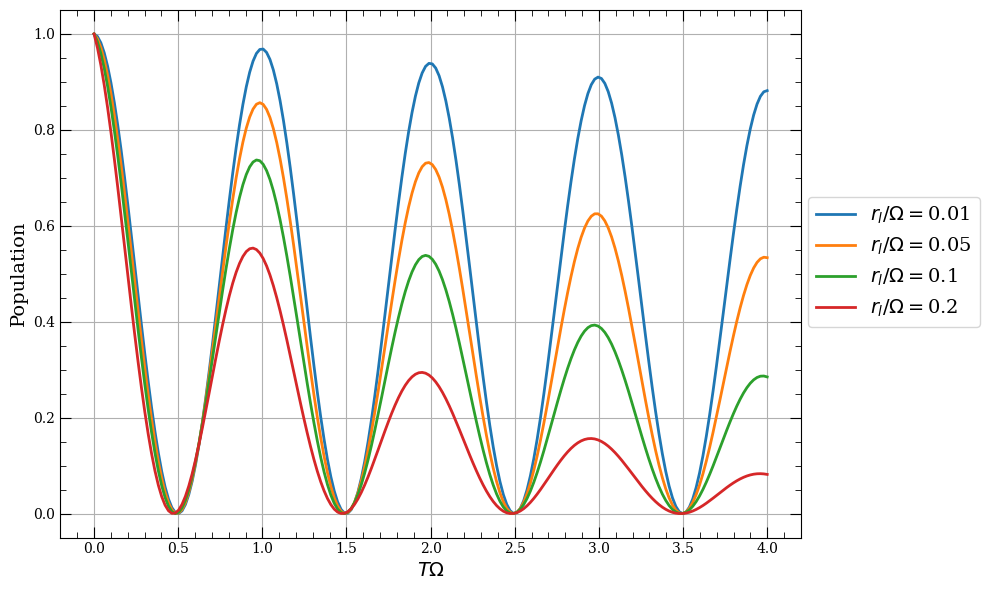

In [93]:
total_state = 3
rabi_r = 1e6
pho0 = nps.zeros((total_state,total_state)).astype(nps.complex64)
pho0[0,0] = 1
H = nps.zeros((total_state,total_state))
H[1,0] = nps.pi*rabi_r
H[0,1] = nps.pi*rabi_r
y0 = nps.concatenate((pho0.real.flatten(), pho0.imag.flatten()))
t_span = (0, 4/rabi_r)
t_eval = nps.linspace(*t_span, 200)
detuning = 1e9
# Plot populations
fig, ax = plt.subplots(figsize=(10, 6))
for rate in [0.01, 0.05,0.1,0.2]:
    Hl = nps.zeros((total_state,total_state))
    # for i, qs in enumerate(matrix_qs):
    Hl[2,0] = nps.sqrt(2*nps.pi*rate*1e6)
        # H[i+2,i+2] = detuning 
    # Hl[0,2] = nps.sqrt(270e3*nps.pi)
    Hl_dag = Hl.conj().T
    def linbald(t,y):
        psi = y[:total_state*total_state].reshape(total_state,total_state) + 1j* y[total_state**2:].reshape(total_state,total_state)
        evo = -1j*(H@psi-psi@H)+Hl@psi@Hl_dag-1/2*(Hl_dag@Hl@psi+psi@Hl_dag@Hl)
        return nps.concatenate((evo.real.flatten(), evo.imag.flatten()))
        
    sol = solve_ivp(linbald, t_span, y0, t_eval=t_eval, method='RK45',rtol=1e-6, atol=1e-6)
    c= sol.y
    steps = c.shape[-1]
    cg = c[:total_state*total_state,:].reshape(total_state,total_state, steps) + 1j* c[total_state**2:,:].reshape(total_state,total_state, steps)
    Pg = cg[0,0]
    Pe = cg[1,1]
    Pr = cg[2,2]
    
    ax.plot(sol.t*1e6, Pg, label='$r_l/\Omega=$'+'{}'.format(rate), lw=2)
# plt.text(2.5,0.85,, fontsize=16)
# plt.plot(sol.t*1e6, Pe, label=r'$|c_e|^2$', lw=2)
# plt.plot(sol.t*1e6, Pr, label=r'$|c_r|^2$', lw=2)
ax.set_xlabel('$T\Omega$', fontsize=14)
ax.set_ylabel('Population', fontsize=14)
# ax.set_title()
ax.legend(loc=(1.01,0.4),fontsize=14)
ax.grid(True)
fig.tight_layout()
fig.show()
fig.savefig('RydbergRabiwithRydbergLoss.pdf')

In [374]:
cs.getTransitionFrequency(n1=55, l1=1, j1=3/2, n2=54, l2=2, j2=3/2, s=0.5)/1e9

4.038343075371832

<h2> Sideband to D5/2 and D3/2 </h2>

In [152]:
nsss = range(15,80,2)
ratio = []
for ns in nsss:
    k = 2*nps.pi/cs.getTransitionWavelength(n1=6,l1=0,j1=1/2,n2=ns,l2=1,j2=3/2)
    d = cs.getDipoleMatrixElement(n1=6, l1=0, j1=1/2, mj1=1/2, n2=ns, l2=1, j2=3/2, mj2=3/2,q=1, s=0.5)*bohr_r/h*e
    rabi_r = 1e6
    E_c = 2*rabi_r/d
    E_sb=E_c*1
    # print(E_c)
    n=S(6)
    l=S(0)
    j=S(1)/2
    f=S(4)
    m=S(0)
    I=S(7)/2
    s=S(1)/2
    np=S(ns)
    lp=S(2)
    jp=S(3)/2
    fp=S(3)
    mp=S(1)
    q=S(1)
    # E_sb = 1
    k2 = 2*nps.pi/cs.getTransitionWavelength(n1=6, l1=0, j1=1/2, n2=ns, l2=2, j2=3/2, s= 0.5)
    matrix_qs = []
    strength = 0
    for j2  in [3,5]:
        Ifloat = float(I)
        fs= nps.arange(Ifloat-j2/2,Ifloat+j2/2+1)
        for f2 in fs:
            jp=S(j2)/2
            fp=S(int(f2))
            reduced_matrix = (-1)**(I+j+jp+s+lp+f)*sqrt(2*f+1)*sqrt(2*fp+1)*sqrt(2*j+1)*sqrt(2*jp+1)*sqrt(2*l+1)*\
            clebsch_gordan(l,S(2),lp,S(0), S(0),S(0))*wigner_6j(j,I,f,fp, S(2),jp)*wigner_6j(l,s,j,jp, S(2),lp)*\
            cs.getQuadrupoleMatrixElement(n1=int(np), l1=int(lp), j1=float(jp), n2=int(n), l2=int(l), j2=float(j), s=0.5)*bohr_r**2
            
            cnq = (-1)**(-q)*nps.sqrt(2/3)*clebsch_gordan(S(1),S(1),S(2),S(0),-S(q),-S(q))
            
            q_fm = clebsch_gordan(f,S(2),fp,m, q,mp)*reduced_matrix/sqrt(2*fp+1)*cnq*k2*e
            if q_fm != 0:
                strength += nps.abs(float(q_fm)/h)
                matrix_qs.append(float(q_fm)*E_sb/2/h)
                # print(f'j={jp},f={fp},Q={q_fm*E_sb/2/h}')
    # print(matrix_qs)
    # print(nps.sum(nps.abs(matrix_qs))/1e6)
    print(ns, strength/d)
    ratio.append(strength/d)

15 0.04875155098592334
17 0.05075999027932405
19 0.05218941184964538
21 0.05325546410039144
23 0.05407993581234555
25 0.05473628521874
27 0.055271236301252503
29 0.05571582947303742
31 0.05609144490642179
33 0.056413264231917976
35 0.05669235123399275
37 0.056936951314556054
39 0.0571533303856849
41 0.05734633229867919
43 0.05751975869513413
45 0.05767663376247383
47 0.05781939243855863
49 0.05795001672930979
51 0.05807013592811964
53 0.05818110147348507
55 0.05828404351571688
57 0.05837991435128601
59 0.05846952188657634
61 0.05855355600670175
63 0.05863260923615738
65 0.0587071933895706
67 0.058777752687740756
69 0.058844674642559325
71 0.05890829872832527
73 0.05896892368001345
75 0.059026813292885255
77 0.05908220148058241
79 0.05913529630608834


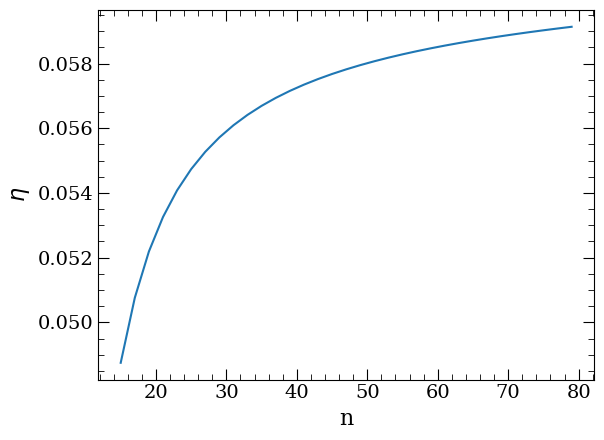

In [154]:
fig, ax = plt.subplots()
ax.plot(nsss, ratio)
ax.set_ylabel('$\eta$',fontsize=16)
ax.set_xlabel('n', fontsize=16)
ax.tick_params(labelsize=14)
fig.savefig('quadrupole_d.png')

-239.25866005072004
-323.03611159109
-73.25770420828574
182.73682005935524
-78.78396679646931
-184.23913207710137
-65.45904258314464
275.7438837876426
415.6995457995336


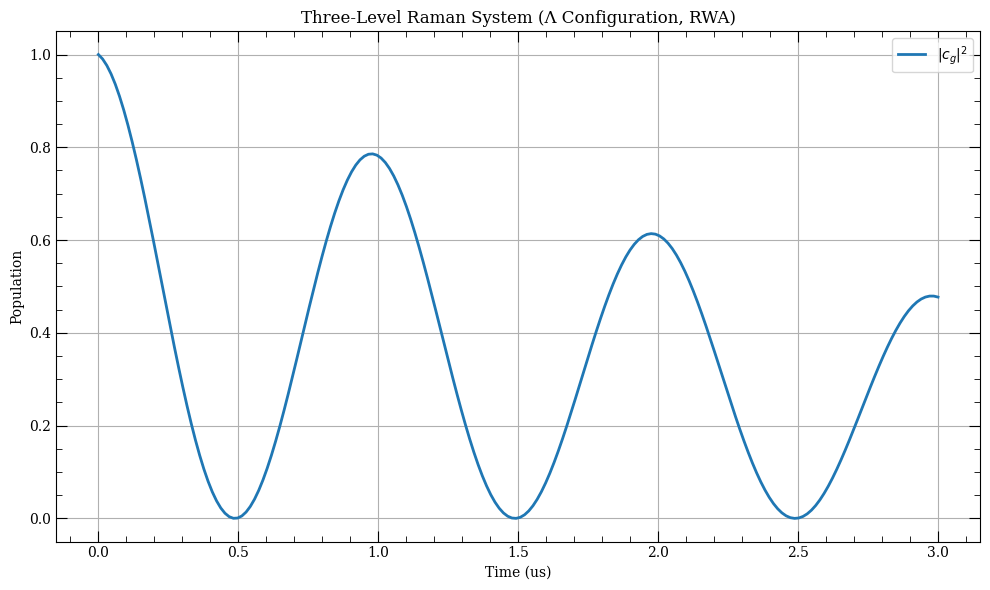

In [127]:
total_state = 2+ len(matrix_qs)
pho0 = nps.zeros((total_state,total_state)).astype(nps.complex64)
pho0[0,0] = 1
H = nps.zeros((total_state,total_state))
H[1,0] = nps.pi*rabi_r
H[0,1] = nps.pi*rabi_r
y0 = nps.concatenate((pho0.real.flatten(), pho0.imag.flatten()))
t_span = (0, 3/rabi_r)
t_eval = nps.linspace(*t_span, 200)

Hl = nps.zeros((total_state,total_state))
for i, qs in enumerate(matrix_qs):
    print(qs)
    Hl[i+2,0] = qs
    # H[i+2,i+2] = detuning 
    # H[0,i+2] = qs.conj().T*nps.pi
Hl_dag = Hl.conj().T
def linbald(t,y):
    psi = y[:total_state*total_state].reshape(total_state,total_state) + 1j* y[total_state**2:].reshape(total_state,total_state)
    evo = -1j*(H@psi-psi@H)+Hl@psi@Hl_dag-1/2*(Hl_dag@Hl@psi+psi@Hl_dag@Hl)
    return nps.concatenate((evo.real.flatten(), evo.imag.flatten()))
    
sol = solve_ivp(linbald, t_span, y0, t_eval=t_eval, method='RK45',rtol=1e-6, atol=1e-6)
c= sol.y
steps = c.shape[-1]
cg = c[:total_state*total_state,:].reshape(total_state,total_state, steps) + 1j* c[total_state**2:,:].reshape(total_state,total_state, steps)
Pg = cg[0,0]
Pe = cg[1,1]
Pr = cg[2,2]
# Plot populations
plt.figure(figsize=(10, 6))
plt.plot(sol.t*1e6, Pg, label=r'$|c_g|^2$', lw=2)
# plt.plot(sol.t*1e6, Pe, label=r'$|c_e|^2$', lw=2)
# plt.plot(sol.t*1e6, Pr, label=r'$|c_r|^2$', lw=2)
plt.xlabel('Time (us)')
plt.ylabel('Population')
plt.title('Three-Level Raman System (Λ Configuration, RWA)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2>Sideband to (n+1)s1/2 </h2>

In [171]:
k = 2*nps.pi/cs.getTransitionWavelength(n1=6,l1=0,j1=1/2,n2=n,l2=1,j2=3/2)
d = cs.getDipoleMatrixElement(n1=6, l1=0, j1=1/2, mj1=1/2, n2=60, l2=1, j2=3/2, mj2=3/2,q=1, s=0.5)*bohr_r/h*e
rabi_r = 1e6
E_c = 2*rabi_r/d
E_sb=E_c*10
ns=60
n=S(6)
l=S(0)
j=S(1)/2
f=S(4)
m=S(0)
I=S(7)/2
s=S(1)/2
np=S(ns)
lp=S(0)
jp=S(1)/2
fp=S(3)
mp=S(0)
q=S(1)
# E_sb = 1
k2 = 2*nps.pi/cs.getTransitionWavelength(n1=6, l1=0, j1=1/2, n2=60, l2=0, j2=1/2, s= 0.5)
matrix_qs = []
for j2  in [1]:
    Ifloat = float(I)
    fs= nps.arange(Ifloat-j2/2,Ifloat+j2/2+1)
    for f2 in fs:
        jp=S(j2)/2
        fp=S(int(f2))
        reduced_matrix = (-1)**(I+j+jp+s+lp+f)*sqrt(2*f+1)*sqrt(2*fp+1)*sqrt(2*j+1)*sqrt(2*jp+1)*sqrt(2*l+1)*\
        clebsch_gordan(l,S(2),lp,S(0), S(0),S(0))*wigner_6j(j,I,f,fp, S(2),jp)*wigner_6j(l,s,j,jp, S(2),lp)*\
        cs.getQuadrupoleMatrixElement(n1=int(np), l1=int(lp), j1=float(jp), n2=int(n), l2=int(l), j2=float(j), s=0.5)*bohr_r**2
        cnq = (-1)**(-q)*nps.sqrt(2/3)*clebsch_gordan(S(1),S(1),S(2),S(0),-S(q),-S(q))
        
        q_fm = clebsch_gordan(f,S(2),fp,m, q,mp)*reduced_matrix/sqrt(2*fp+1)*cnq*k2*e
        if q_fm != 0:
            matrix_qs.append(float(q_fm)*E_sb/2/h)
            print(f'j={jp},f={fp},Q={q_fm*E_sb/2/h}')
print(matrix_qs)

[]
